In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Observations from the dataset:
1. column names are not mentioned, hence manually input names while importing data
2. missing values were given by '?', therefore should be replaced by 'NaN' while importing for easy data manipulation
3. there's an additional space after every value, so separator has to be used while importing

In [2]:
#Loading the data
train_data = pd.read_csv('adult.data', sep = ' *, *', na_values = '?', names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])
train_data.head()

<ipython-input-2-fcbdbc82c723>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('adult.data', sep = ' *, *', na_values = '?', names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Details about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Statistical summary of all numeric features
train_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The NaN values in the dataset of all non-numeric values will be replaced by the Modes of their respective features

In [5]:
train_data['workclass'].replace('NaN', train_data['workclass'].mode()[0], inplace = True)
train_data['occupation'].replace('NaN', train_data['occupation'].mode()[0], inplace = True)
train_data['native_country'].replace('NaN', train_data['native_country'].mode()[0], inplace = True)

In [6]:
#Check for any Nan features
display(train_data.workclass.value_counts())
display(train_data.occupation.value_counts())
display(train_data.native_country.value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

There are too many categories in the education feature. A simple way is to join '1st' to '10th' as Primary/Secondary School & '11th' to '12th' as HS-grad

In [7]:
pri_sec_sch = ['1st-4th','5th-6th','7th-8th','9th','10th']
high_sch = ['11th','12th']
train_data['education'].replace(to_replace = pri_sec_sch, value = 'Primary/Secondary_school', inplace = True)
train_data['education'].replace(to_replace = high_sch, value = 'HS-grad', inplace = True)

As done to education feature, we do similar simplification to the marital_status

In [8]:
married = ['Married-civ-spouse','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse']
unmarried = ['Never-married']
train_data['marital_status'].replace(to_replace = married, value = 'married', inplace = True)
train_data['marital_status'].replace(to_replace = unmarried, value = 'unmarried', inplace = True)

In [9]:
#Check for any NaN features
display(train_data.education.value_counts())
display(train_data.marital_status.value_counts())

HS-grad                     12109
Some-college                 7291
Bachelors                    5355
Primary/Secondary_school     2594
Masters                      1723
Assoc-voc                    1382
Assoc-acdm                   1067
Prof-school                   576
Doctorate                     413
Preschool                      51
Name: education, dtype: int64

married      21878
unmarried    10683
Name: marital_status, dtype: int64

<=50k: 24720
>50k: 7841


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


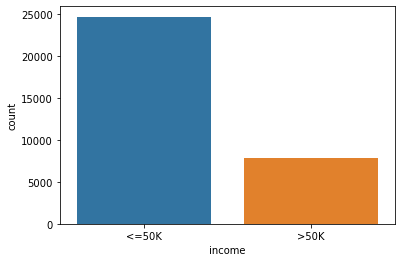

In [10]:
#Visualizing the Class Balance of the target variable (income)
ax = sns.countplot('income', label = 'Count', data = train_data)
less_than_50k, greater_than_50k = train_data.income.value_counts()
print('<=50k:', less_than_50k)
print('>50k:', greater_than_50k)

As seen from above chart, number of people earning less than 50K are approximately 3 times more than that of people earning more than 50K

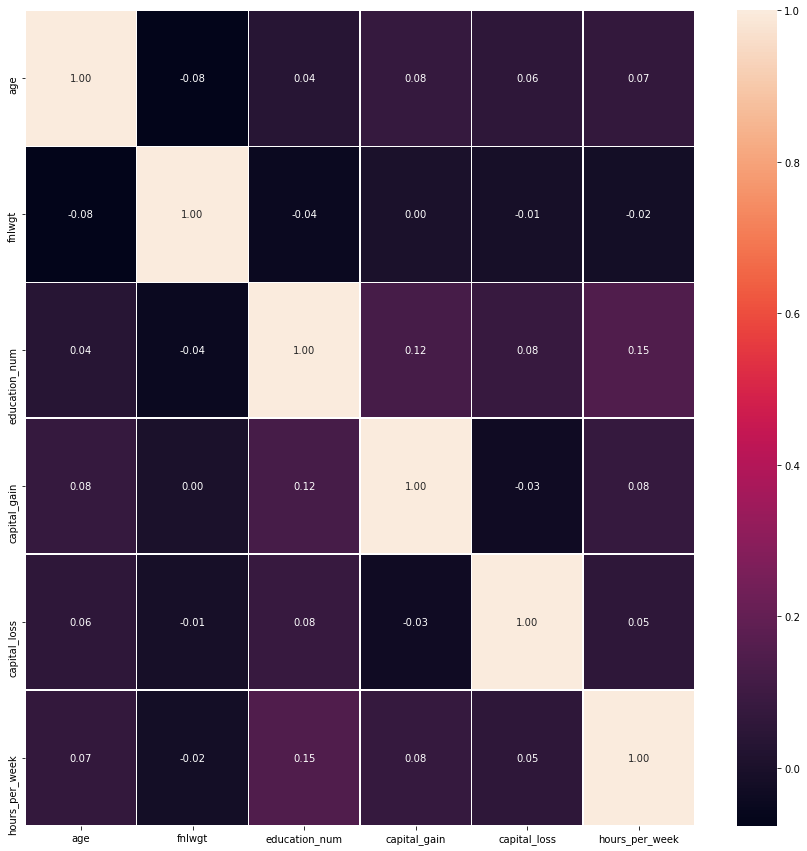

In [11]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data = train_data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax);

As seen above, there's no correlation between any of the numeric variables. This means scaling has to be done during preprocessing/cleaning of data

# Exploratory Data Analysis

Before heading to modelling part, below is a short data exploration

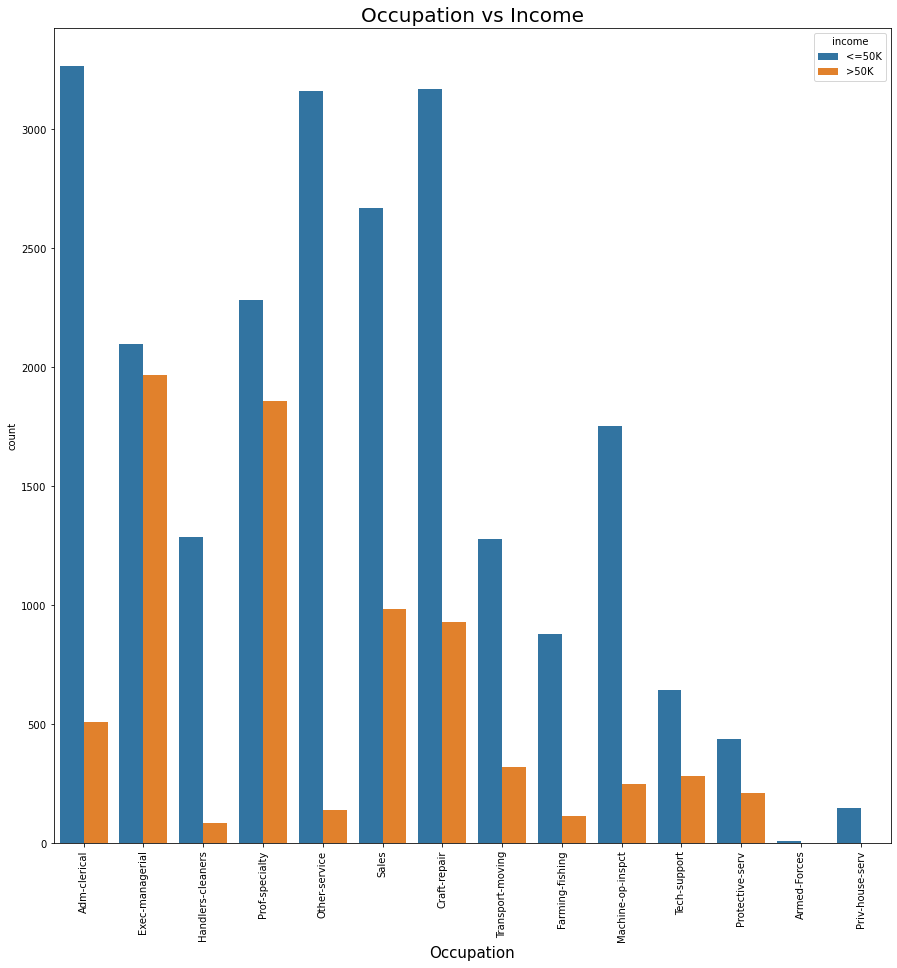

In [12]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'occupation', data = train_data, hue = 'income')
ax.set_title('Occupation vs Income', fontsize = 20)
plt.xlabel('Occupation', fontsize = 15)
plt.xticks(rotation = 90);

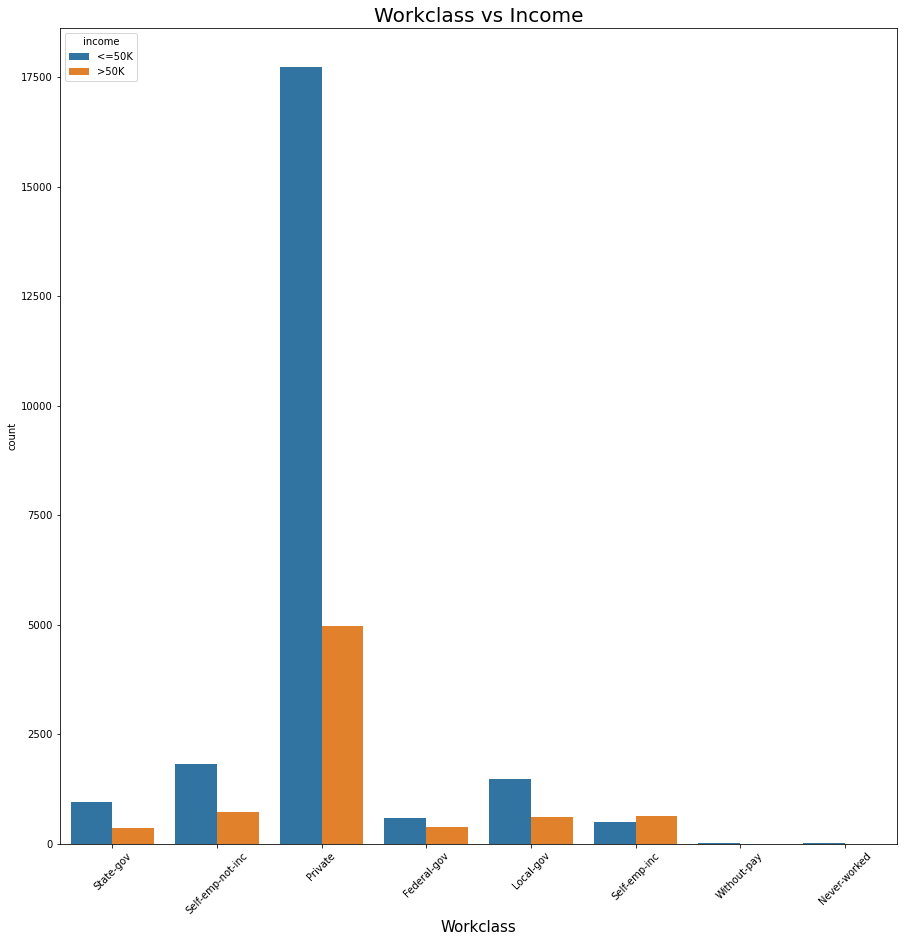

In [13]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'workclass', data = train_data, hue = 'income')
ax.set_title('Workclass vs Income', fontsize = 20)
plt.xlabel('Workclass', fontsize = 15)
plt.xticks(rotation = 45);

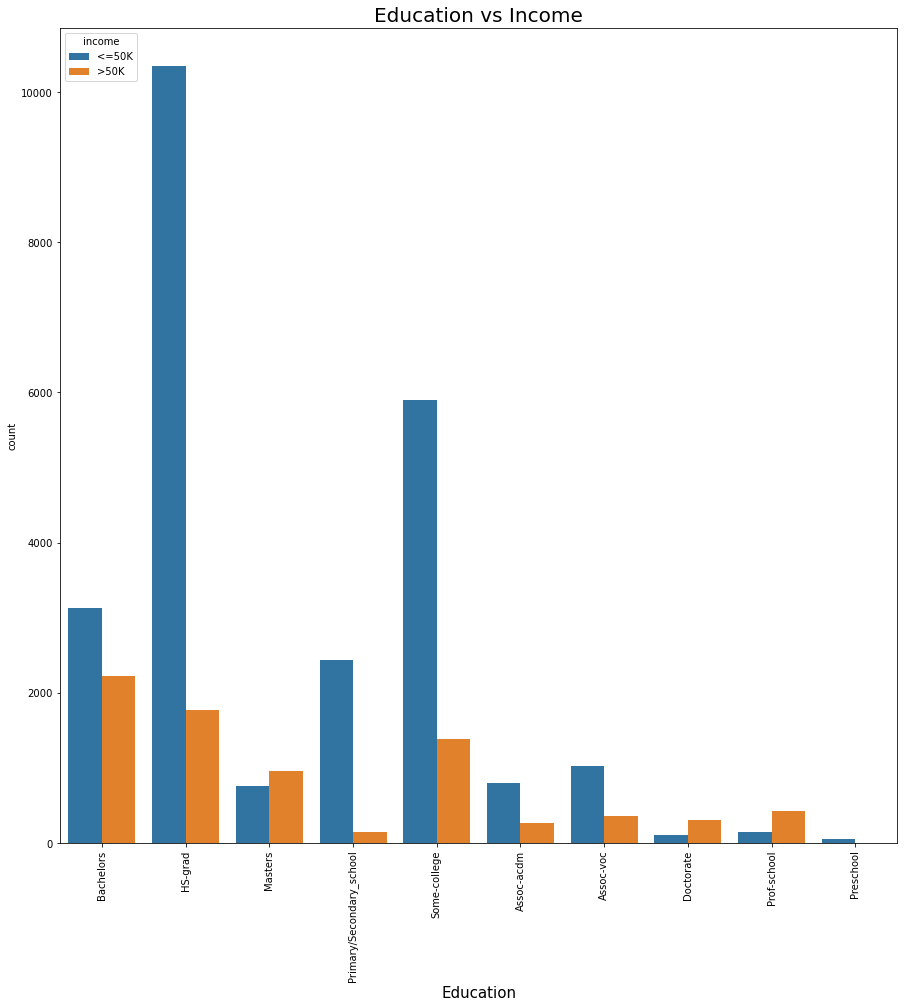

In [14]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'education', data = train_data, hue = 'income')
ax.set_title('Education vs Income', fontsize = 20)
plt.xlabel('Education', fontsize = 15)
plt.xticks(rotation = 90);

As seen from above plot, people earning more than 50K are those who have studied Bachelors, HS-grad or Masters

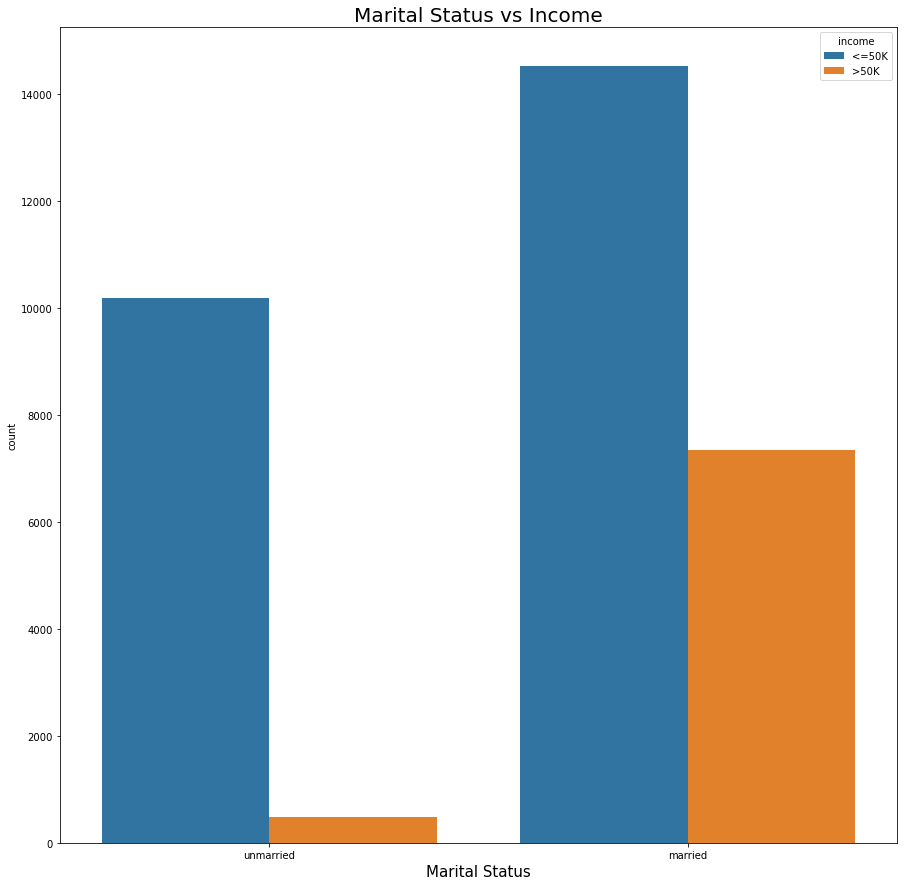

In [15]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'marital_status', data = train_data, hue = 'income')
ax.set_title('Marital Status vs Income', fontsize = 20)
plt.xlabel('Marital Status', fontsize = 15);

As per above chart, married persons are well settled or have a higher income compared to unmarried ones

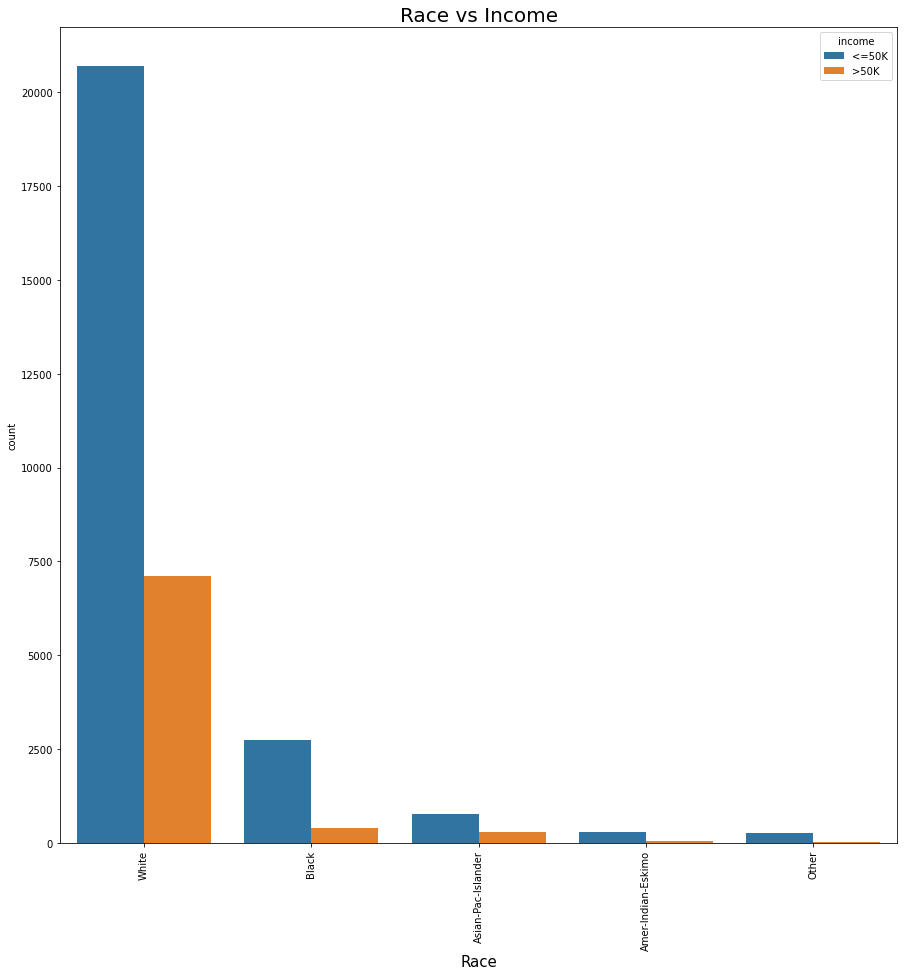

In [16]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'race', data = train_data, hue = 'income')
ax.set_title('Race vs Income', fontsize = 20)
plt.xlabel('Race', fontsize = 15)
plt.xticks(rotation = 90);

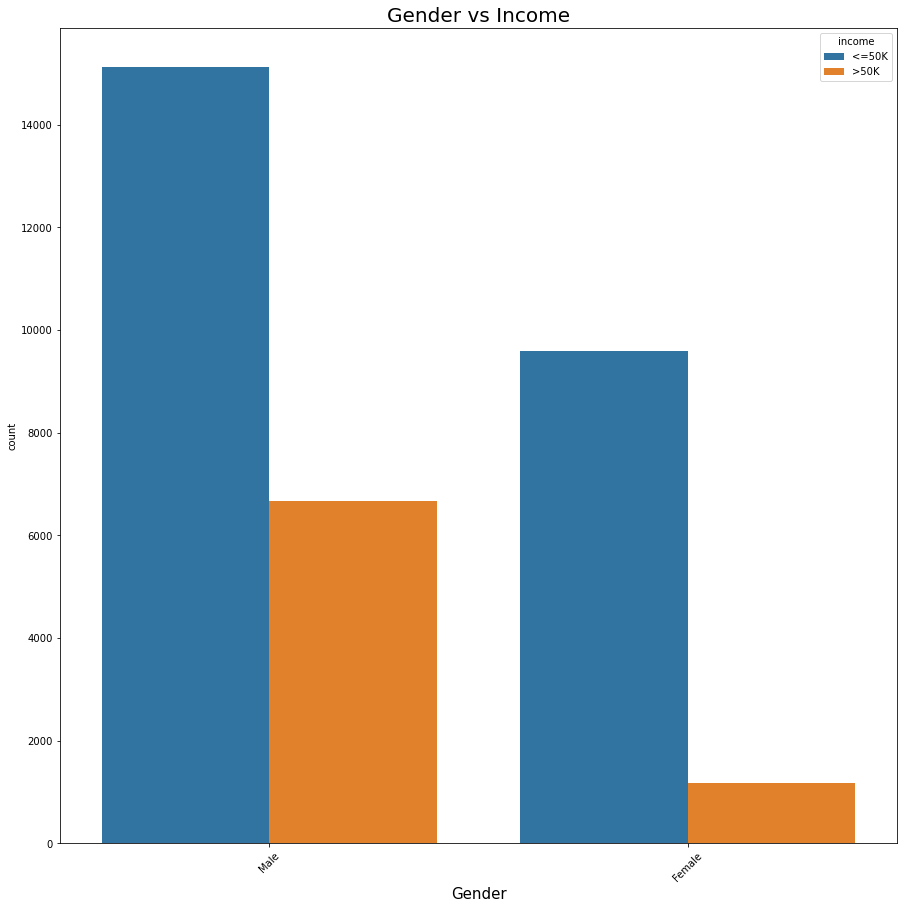

In [17]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'sex', data = train_data, hue = 'income')
ax.set_title('Gender vs Income', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.xticks(rotation = 45);

Most of highest earning persons are Males, as per above chart

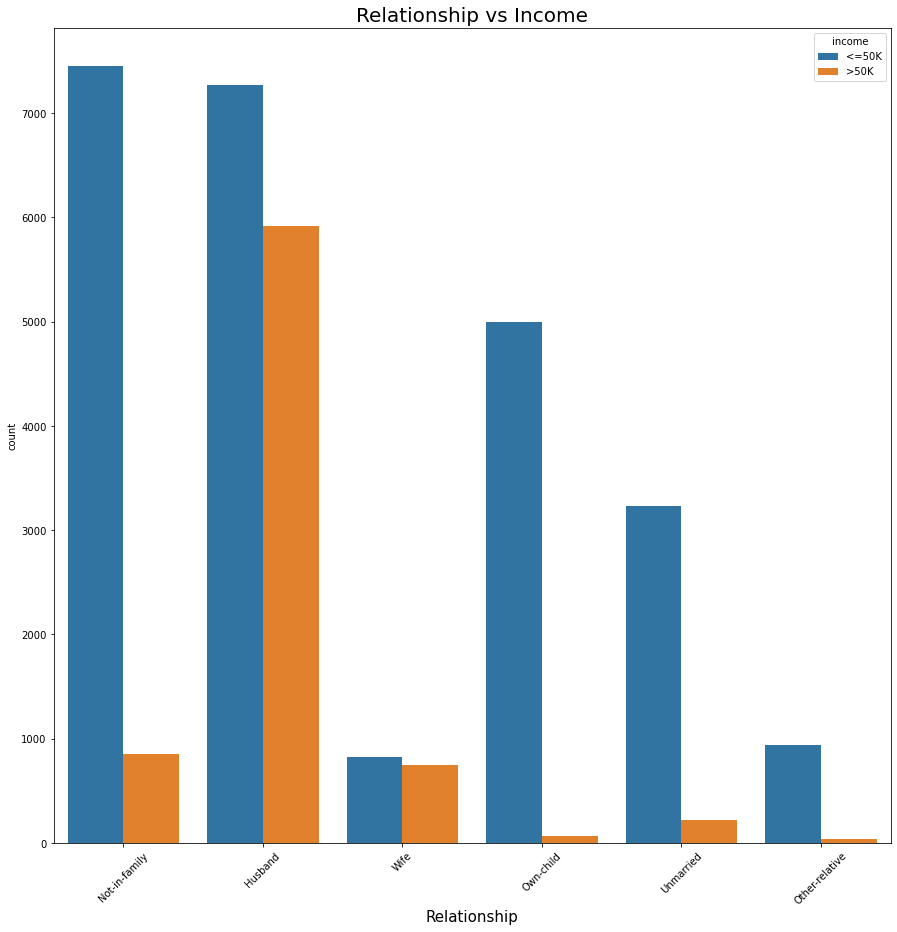

In [18]:
fig = plt.figure(figsize = (15, 15))
ax = sns.countplot(x = 'relationship', data = train_data, hue = 'income')
ax.set_title('Relationship vs Income', fontsize = 20)
plt.xlabel('Relationship', fontsize = 15)
plt.xticks(rotation = 45);

Mean age: 38.58164675532078
Std age: 13.640432553581146
Median age: 37.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


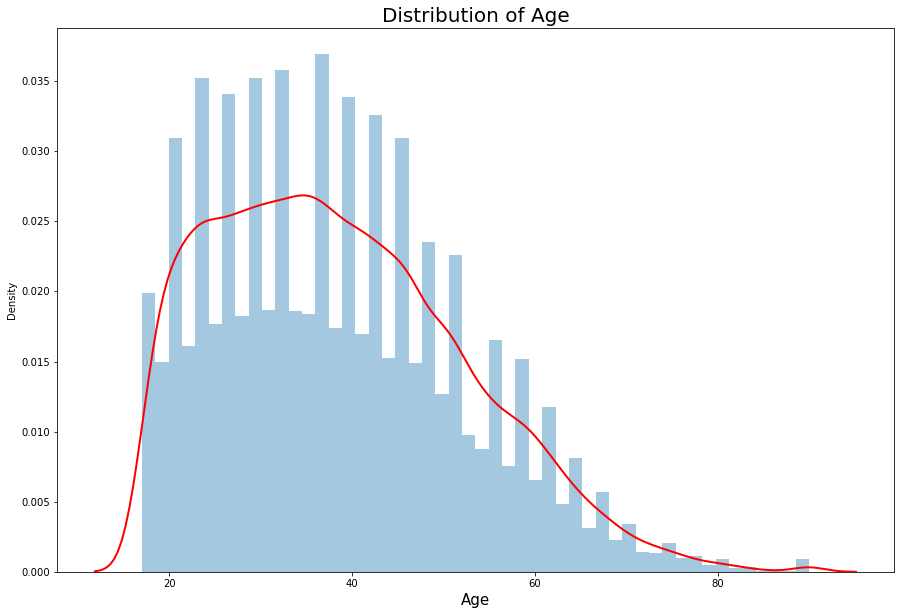

In [19]:
print('Mean age:', train_data['age'].mean())
print('Std age:', train_data['age'].std())
print('Median age:', train_data['age'].median())
fig = plt.figure(figsize = (15, 10))
ax = sns.distplot(x = train_data['age'], kde_kws = {'color':'r', 'lw':2, 'label':'KDE'})
ax.set_title('Distribution of Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15);

The age feature is approximately normally distributed with mean age of 39, median age of 37 & standard deviation age of 14

Mean fnlwgt: 189778.36651208502
Std fnlwgt: 105549.97769702233
Median fnlwgt: 178356.0


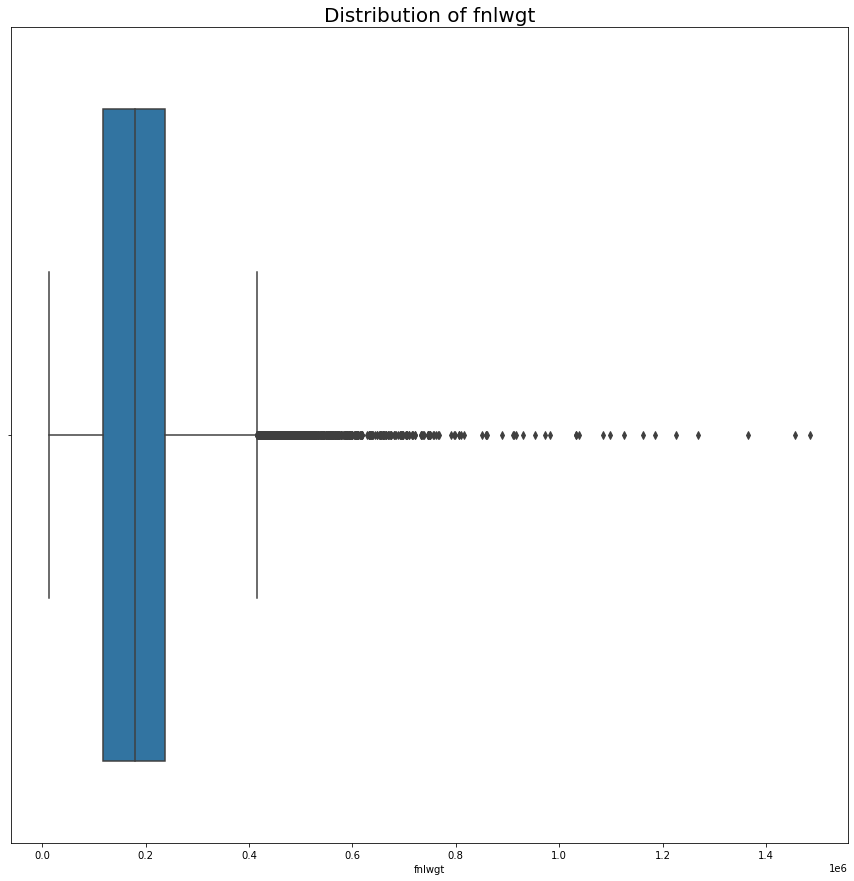

In [20]:
print('Mean fnlwgt:', train_data['fnlwgt'].mean())
print('Std fnlwgt:', train_data['fnlwgt'].std())
print('Median fnlwgt:', train_data['fnlwgt'].median())
fig = plt.figure(figsize = (15, 15))
ax = sns.boxplot(x = 'fnlwgt', data = train_data)
ax.set_title('Distribution of fnlwgt', fontsize = 20);

Mean education_num: 10.0806793403151
Std educatoin_num: 2.5727203320673406
Median education_num: 10.0


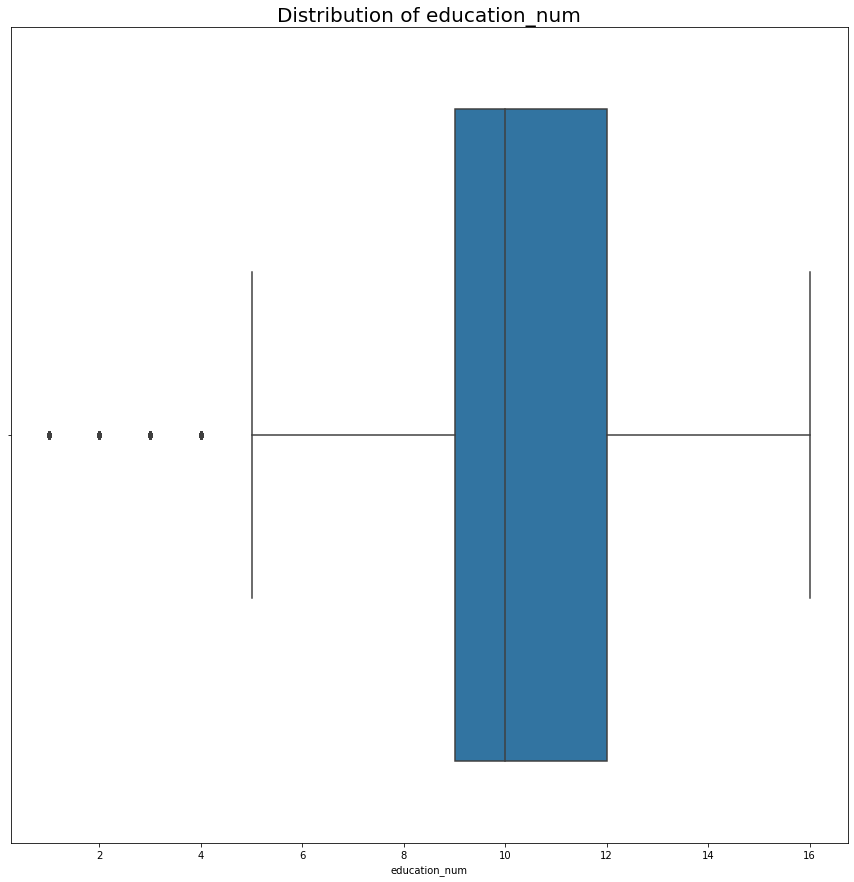

In [21]:
print('Mean education_num:', train_data['education_num'].mean())
print('Std educatoin_num:', train_data['education_num'].std())
print('Median education_num:', train_data['education_num'].median())
fig = plt.figure(figsize = (15, 15))
ax = sns.boxplot(x = 'education_num', data = train_data)
ax.set_title('Distribution of education_num', fontsize = 20);

Mean capital_gain: 1077.6488437087312
Std capital_gain: 7385.292084839299
Median capital_gain: 0.0


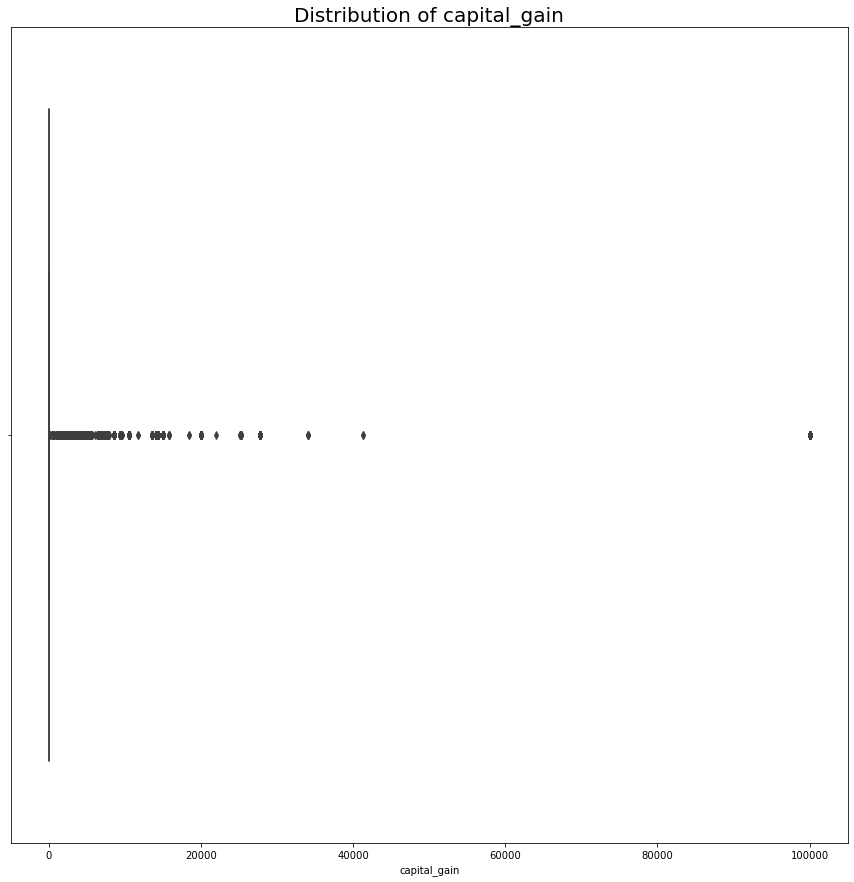

In [22]:
print('Mean capital_gain:', train_data['capital_gain'].mean())
print('Std capital_gain:', train_data['capital_gain'].std())
print('Median capital_gain:', train_data['capital_gain'].median())
fig = plt.figure(figsize = (15, 15))
ax = sns.boxplot(x = 'capital_gain', data = train_data)
ax.set_title('Distribution of capital_gain', fontsize = 20);

Mean capital_loss: 87.303829734959
Std capital_loss: 402.960218649059
Median capital_loss: 0.0


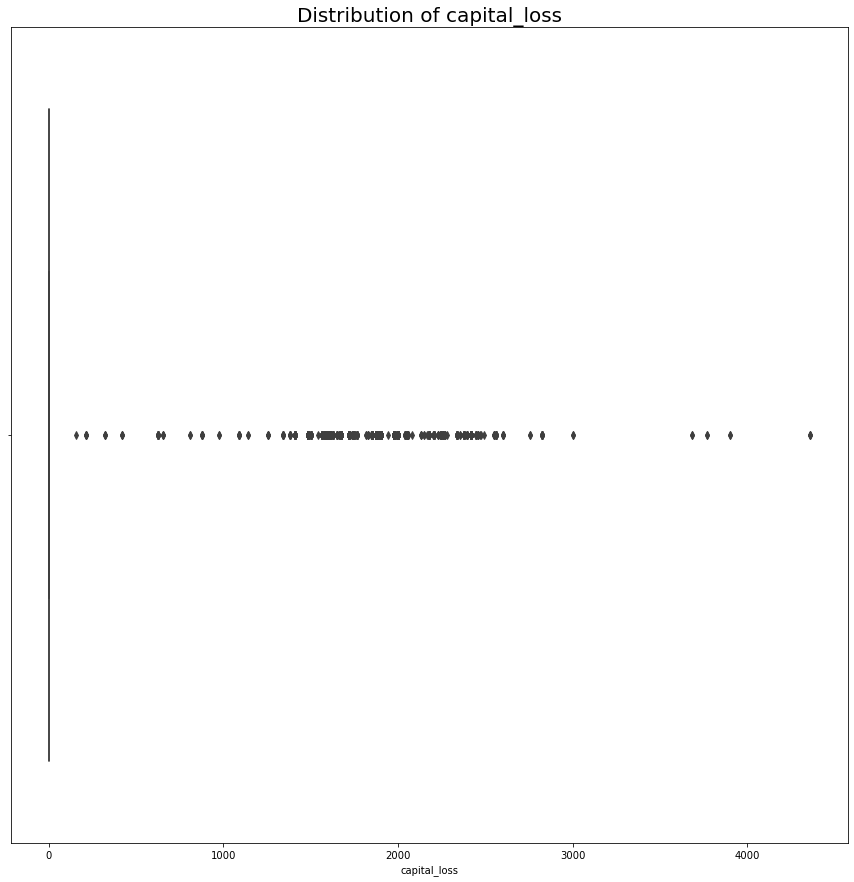

In [23]:
print('Mean capital_loss:', train_data['capital_loss'].mean())
print('Std capital_loss:', train_data['capital_loss'].std())
print('Median capital_loss:', train_data['capital_loss'].median())
fig = plt.figure(figsize = (15, 15))
ax = sns.boxplot(x = 'capital_loss', data = train_data)
ax.set_title('Distribution of capital_loss', fontsize = 20);

Mean hours_per_week: 40.437455852092995
Std hours_per_week: 12.34742868173081
Median hours_per_week: 40.0


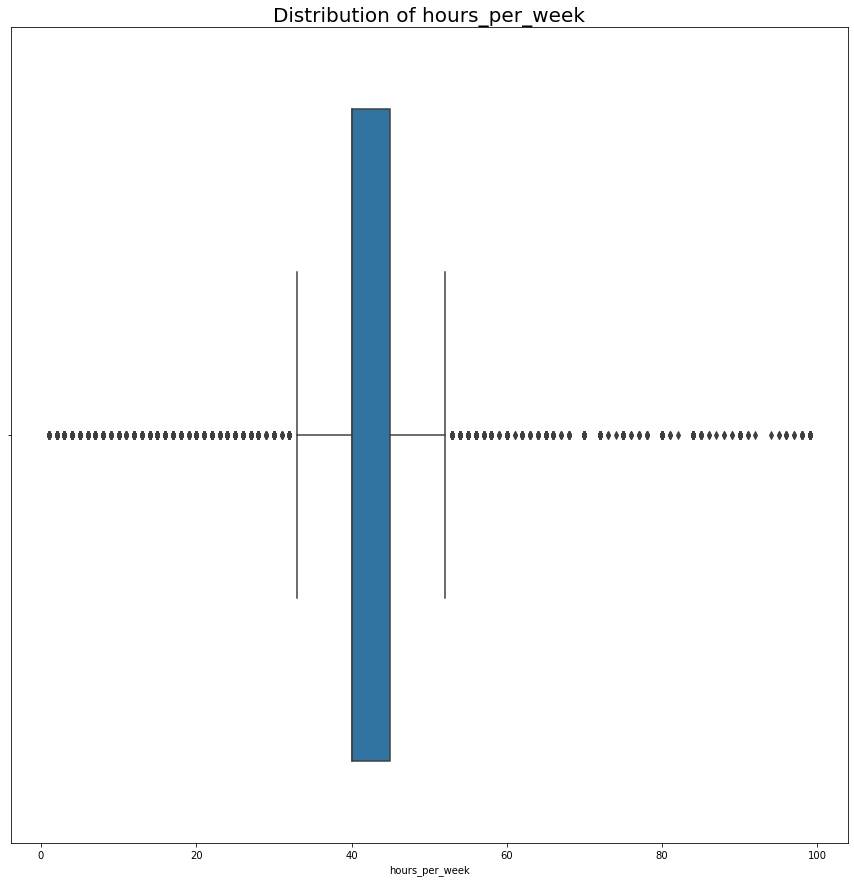

In [24]:
print('Mean hours_per_week:', train_data['hours_per_week'].mean())
print('Std hours_per_week:', train_data['hours_per_week'].std())
print('Median hours_per_week:', train_data['hours_per_week'].median())
fig = plt.figure(figsize = (15, 15))
ax = sns.boxplot(x = 'hours_per_week', data = train_data)
ax.set_title('Distribution of hours_per_week', fontsize = 20);

# Data Preprocessing

A prerequisite step before beginning of modelling is to make sure all numeric features is scaled & categorial features to be one-hot-encoded (except target variable (income)).
Firstly its important to convert the target variable (income) to numeric, which is done below.
All those earning less than 50K is encoded as 0 & above 50K are encoded as 1.

In [25]:
train_data['income'] = train_data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [26]:
train_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Two things right now:
1. separate out numeric & categorical features except income (target variable)
2. after separation, data scaling to numeric features & one-hot-encoding to categorical features

In [27]:
numeric_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
categorical_cols = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

There are many scaling techniques, like Standard Scaling, Min-Max Scaling, etc. For this case, Robust Scaler is used as this scaling technique is more robust to outliers (as there are many outliers in numeric columns)

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [29]:
scaled_data = scaler.fit_transform(train_data[numeric_cols])
scaled_data = pd.DataFrame(scaled_data, columns = numeric_cols)

Below is One-Hot-Encoding for all categorical features

In [30]:
dummies = pd.get_dummies(train_data[categorical_cols])

In [31]:
dummies.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Primary/Secondary_school', 'education_Prof-school',
       'education_Some-college', 'marital_status_married',
       'marital_status_unmarried', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transpo

In [32]:
scaled_data.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

After preprocessing, we join both scaled numeric features & one-hot-encoded categorical features

In [33]:
X = pd.concat([scaled_data, dummies], axis = 1)
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y = train_data['income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

After cleaning/preprocessing, modelling can be started finally!!!

# Modelling

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22792, 94)
(22792,)
(9769, 94)
(9769,)


In [36]:
display(y_train.value_counts())
display(y_test.value_counts())

0    17170
1     5622
Name: income, dtype: int64

0    7550
1    2219
Name: income, dtype: int64

# 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 1.0, random_state = 1, max_iter = 1000)

In [38]:
model_log = log.fit(X_train, y_train)

In [39]:
preds_log = model_log.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

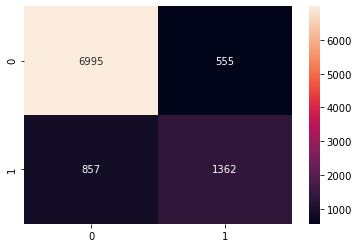

In [41]:
cm_log = confusion_matrix(y_test, preds_log)
sns.heatmap(cm_log, annot = True, fmt = 'd');

In [42]:
acc_log = accuracy_score(y_test, preds_log)
acc_log

0.8554611526256526

In [43]:
print(classification_report(y_test, preds_log))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7550
           1       0.71      0.61      0.66      2219

    accuracy                           0.86      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.86      0.85      9769



# 2. Decision Tree Classification

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [45]:
model_dt = tree.fit(X_train, y_train)

In [46]:
preds_dt = tree.predict(X_test)

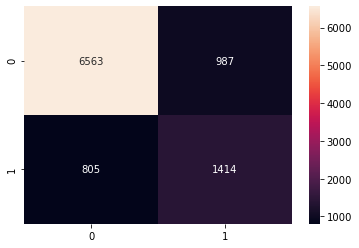

In [47]:
cm_dt = confusion_matrix(y_test, preds_dt)
sns.heatmap(cm_dt, annot = True, fmt = 'd');

In [48]:
acc_dt = accuracy_score(y_test, preds_dt)
acc_dt

0.8165625959668339

In [49]:
print(classification_report(y_test, preds_dt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7550
           1       0.59      0.64      0.61      2219

    accuracy                           0.82      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



# 3. Gaussian Naive Bayes Classification

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [51]:
model_gnb = gnb.fit(X_train, y_train)

In [52]:
preds_gnb = gnb.predict(X_test)

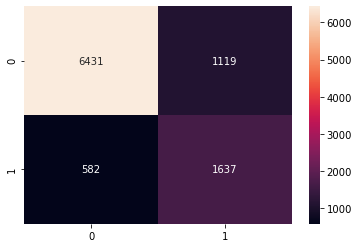

In [53]:
cm_gnb = confusion_matrix(y_test, preds_gnb)
sns.heatmap(cm_gnb, annot = True, fmt = 'd');

In [54]:
acc_gnb = accuracy_score(y_test, preds_gnb)
acc_gnb

0.8258777766403931

In [55]:
print(classification_report(y_test, preds_gnb))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7550
           1       0.59      0.74      0.66      2219

    accuracy                           0.83      9769
   macro avg       0.76      0.79      0.77      9769
weighted avg       0.84      0.83      0.83      9769



# 4. K Nearest Neighbors Classification

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)

In [57]:
model_knn = knn.fit(X_train, y_train)

In [58]:
preds_knn = knn.predict(X_test)

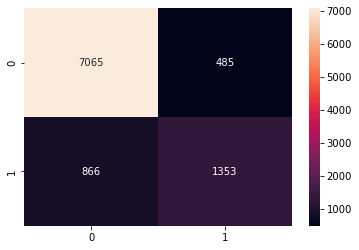

In [59]:
cm_knn = confusion_matrix(y_test, preds_knn)
sns.heatmap(cm_knn, annot = True, fmt = 'd');

In [60]:
acc_knn = accuracy_score(y_test, preds_knn)
acc_knn

0.8617053946156208

In [61]:
print(classification_report(y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7550
           1       0.74      0.61      0.67      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



# 5. Random Forest Classification

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1, class_weight = 'balanced')

In [63]:
model_rf = rf.fit(X_train, y_train)

In [64]:
preds_rf = rf.predict(X_test)

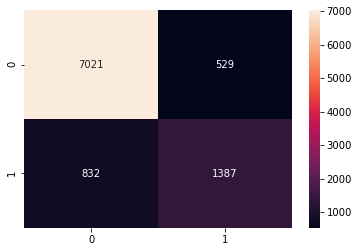

In [65]:
cm_rf = confusion_matrix(y_test, preds_rf)
sns.heatmap(cm_rf, annot = True, fmt = 'd');

In [66]:
acc_rf = accuracy_score(y_test, preds_rf)
acc_rf

0.8606817483877572

In [67]:
print(classification_report(y_test, preds_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7550
           1       0.72      0.63      0.67      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.86      0.86      0.86      9769



# 6. XGBoost

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1, objective = 'binary:logistic')

In [69]:
model_xgb = xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
preds_xgb = xgb.predict(X_test)

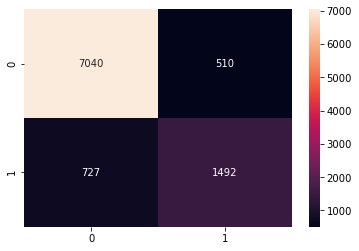

In [71]:
cm_xgb = confusion_matrix(y_test, preds_xgb)
sns.heatmap(cm_xgb, annot = True, fmt = 'd');

In [72]:
acc_xgb = accuracy_score(y_test, preds_xgb)
acc_xgb

0.8733749616132664

In [73]:
print(classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7550
           1       0.75      0.67      0.71      2219

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



# Comparing all Models

In [74]:
data = {'LogisticRegression':acc_log,
        'DecisionTree':acc_dt,
        'GaussianNaiveBayes':acc_gnb,
        'KNN':acc_knn,
        'RandomForest':acc_rf,
        'XGBoost':acc_xgb}
methods = list(data.keys())
scores = list(data.values())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


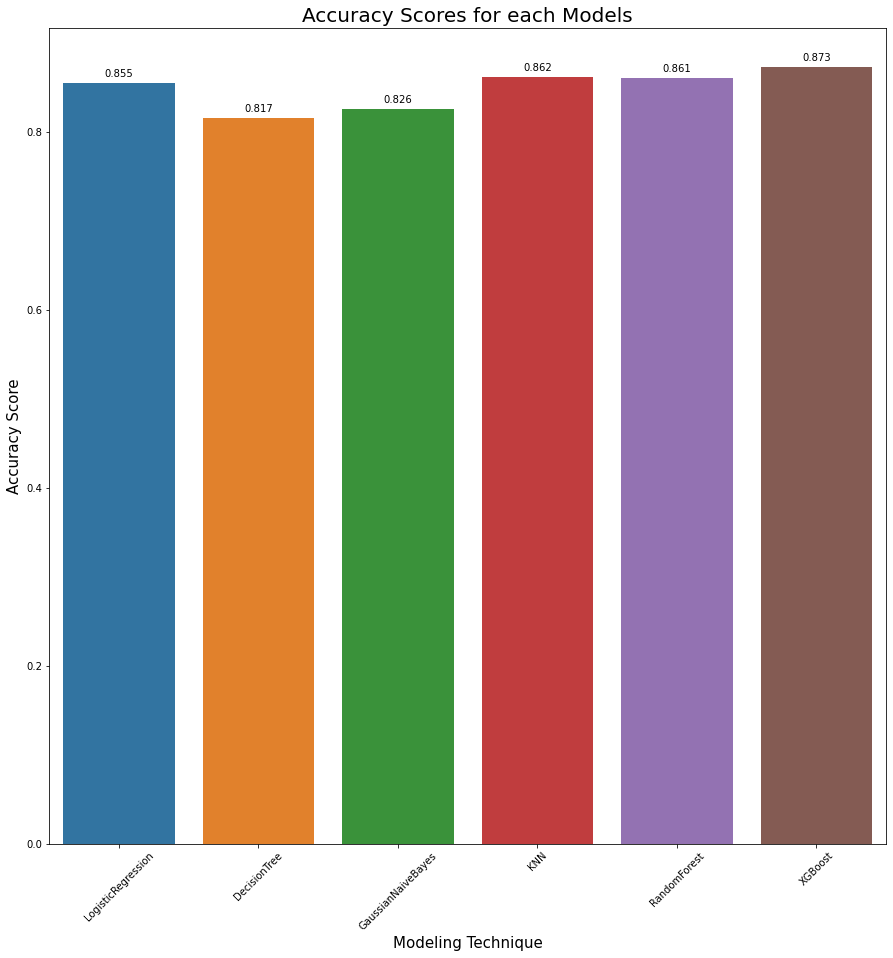

In [75]:
plt.figure(figsize = (15, 15))
splot = sns.barplot(methods, scores)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')    
plt.xticks(rotation = 45)
plt.xlabel('Modeling Technique', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Accuracy Scores for each Models', fontsize = 20);

# Conclusion

1. After doing different modelling techniques, it can be seen that XGBoost performs the best on this dataset with the highest accuracy score of 87.3%.
2. XGBoost also has overall better performance in terms of precision, recall & f1-score. Hence XGBoost model can be used to make prediction whether income would exceed $50K/year or not.